## SVM with non-linear Kernel 

This notebook demonstrates the effect of the kernel parameter $\gamma$ of the RBF Kernel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

#### Creation of data
We create 2 times 100 data points as follows:

In [2]:
r = np.concatenate((np.random.normal(0,1,20),np.random.normal(4,1,20)))
phi = np.random.uniform(0,2*np.pi, 40)


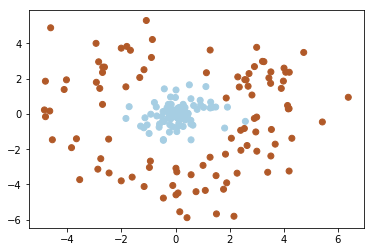

In [3]:
def get_random_data(outlyer_pos=2):
    np.random.seed(42)
    N2 = 100
    y = np.concatenate((np.repeat(-1,N2),np.repeat(1,N2))) 
    r = np.concatenate((np.random.normal(0,1,N2),np.random.normal(4,1,N2)))
    phi = np.random.uniform(0,2*np.pi, 2*N2)
    X = np.empty((2*N2,2))
    for i, phi in enumerate(phi):
        X[i,0] = r[i]*(np.cos(phi))
        X[i,1] = r[i]*(np.sin(phi))
    return X,y

X,y = get_random_data()
np.shape(y)
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)
plt.show()

## Animation

In [4]:
# Plots the data and predictions
# Code taken from: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
def plot_preds(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    ## plotting the prediction 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)    
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("Num SV {}".format(len(clf.support_vectors_)))

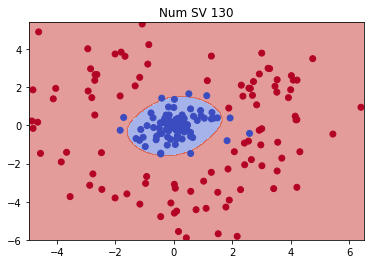

In [5]:
from ipywidgets import *

def plot_func(C, gamma=1):
    X,y = get_random_data(1)
    clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X=X, y=y)
    plot_preds(clf, X, y)

interact(plot_func, 
         C=(0.1,150
            ,0.5),
         gamma=(0.01,1,0.01)
        )